In [113]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import date

In [114]:
#read in the data set
df = pd.read_csv('Comcast_telecom_complaints_data.csv')

In [115]:
#View the data set
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [117]:
#Convert date objects to datetime
df['Date'] = pd.to_datetime(df['Date'])
df["Date_month_year"] = pd.to_datetime(df["Date_month_year"])

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Ticket #                     2224 non-null   object        
 1   Customer Complaint           2224 non-null   object        
 2   Date                         2224 non-null   datetime64[ns]
 3   Date_month_year              2224 non-null   datetime64[ns]
 4   Time                         2224 non-null   object        
 5   Received Via                 2224 non-null   object        
 6   City                         2224 non-null   object        
 7   State                        2224 non-null   object        
 8   Zip code                     2224 non-null   int64         
 9   Status                       2224 non-null   object        
 10  Filing on Behalf of Someone  2224 non-null   object        
dtypes: datetime64[ns](2), int64(1), object(8)
m

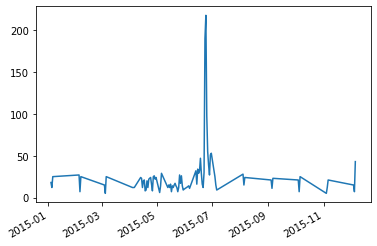

In [119]:
df["Date_month_year"].value_counts().plot();

In [120]:
df['month'] = pd.DatetimeIndex(df['Date_month_year']).month
df['year'] = pd.DatetimeIndex(df['Date_month_year']).year
df['day'] = pd.DatetimeIndex(df['Date_month_year']).day

In [121]:
df.Date_month_year.head()

0   2015-04-22
1   2015-08-04
2   2015-04-18
3   2015-07-05
4   2015-05-26
Name: Date_month_year, dtype: datetime64[ns]

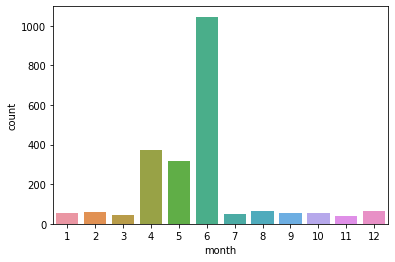

In [122]:
#Number of customer complaints by month
sns.countplot(x='month', data=df);

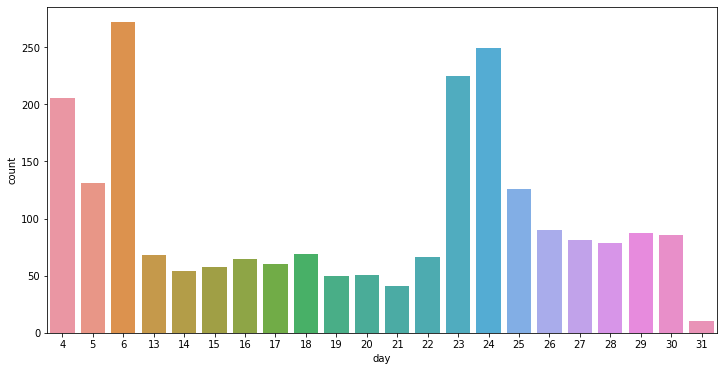

In [123]:
#Number of customer complaints by day
dims = (12, 6)
fig, ax = plt.subplots(figsize=dims)
sns.countplot(x='day', data=df);

In [124]:
#Create a new categorical variable with value as Open and Closed
Status_open_closed = []

for Status in df["Status"]:
    if Status == 'Open' or Status == 'Pending':
        Status_open_closed.append('Open')
    else:
        Status_open_closed.append('Closed')
    
df['Status_open_closed'] = Status_open_closed
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month,year,day,Status_open_closed
0,250635,Comcast Cable Internet Speeds,2015-04-22,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,2015,22,Closed
1,223441,Payment disappear - service got disconnected,2015-04-08,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,2015,4,Closed
2,242732,Speed and Service,2015-04-18,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,2015,18,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,2015,5,Open
4,307175,Comcast not working and no service to boot,2015-05-26,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,2015,26,Closed


In [125]:
df_State = df.groupby(['State']).size().to_frame().reset_index().rename({0: "Count"}, axis=1)
df_State.sort_values(by=['Count'], ascending=False).head()

,State,Count
10,Georgia,288
9,Florida,240
3,California,220
11,Illinois,164
36,Tennessee,143


In [126]:
Status_complaints = df.groupby(["State","Status_open_closed"]).size().unstack().fillna(0)
Status_complaints.head()

Status_open_closed,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0


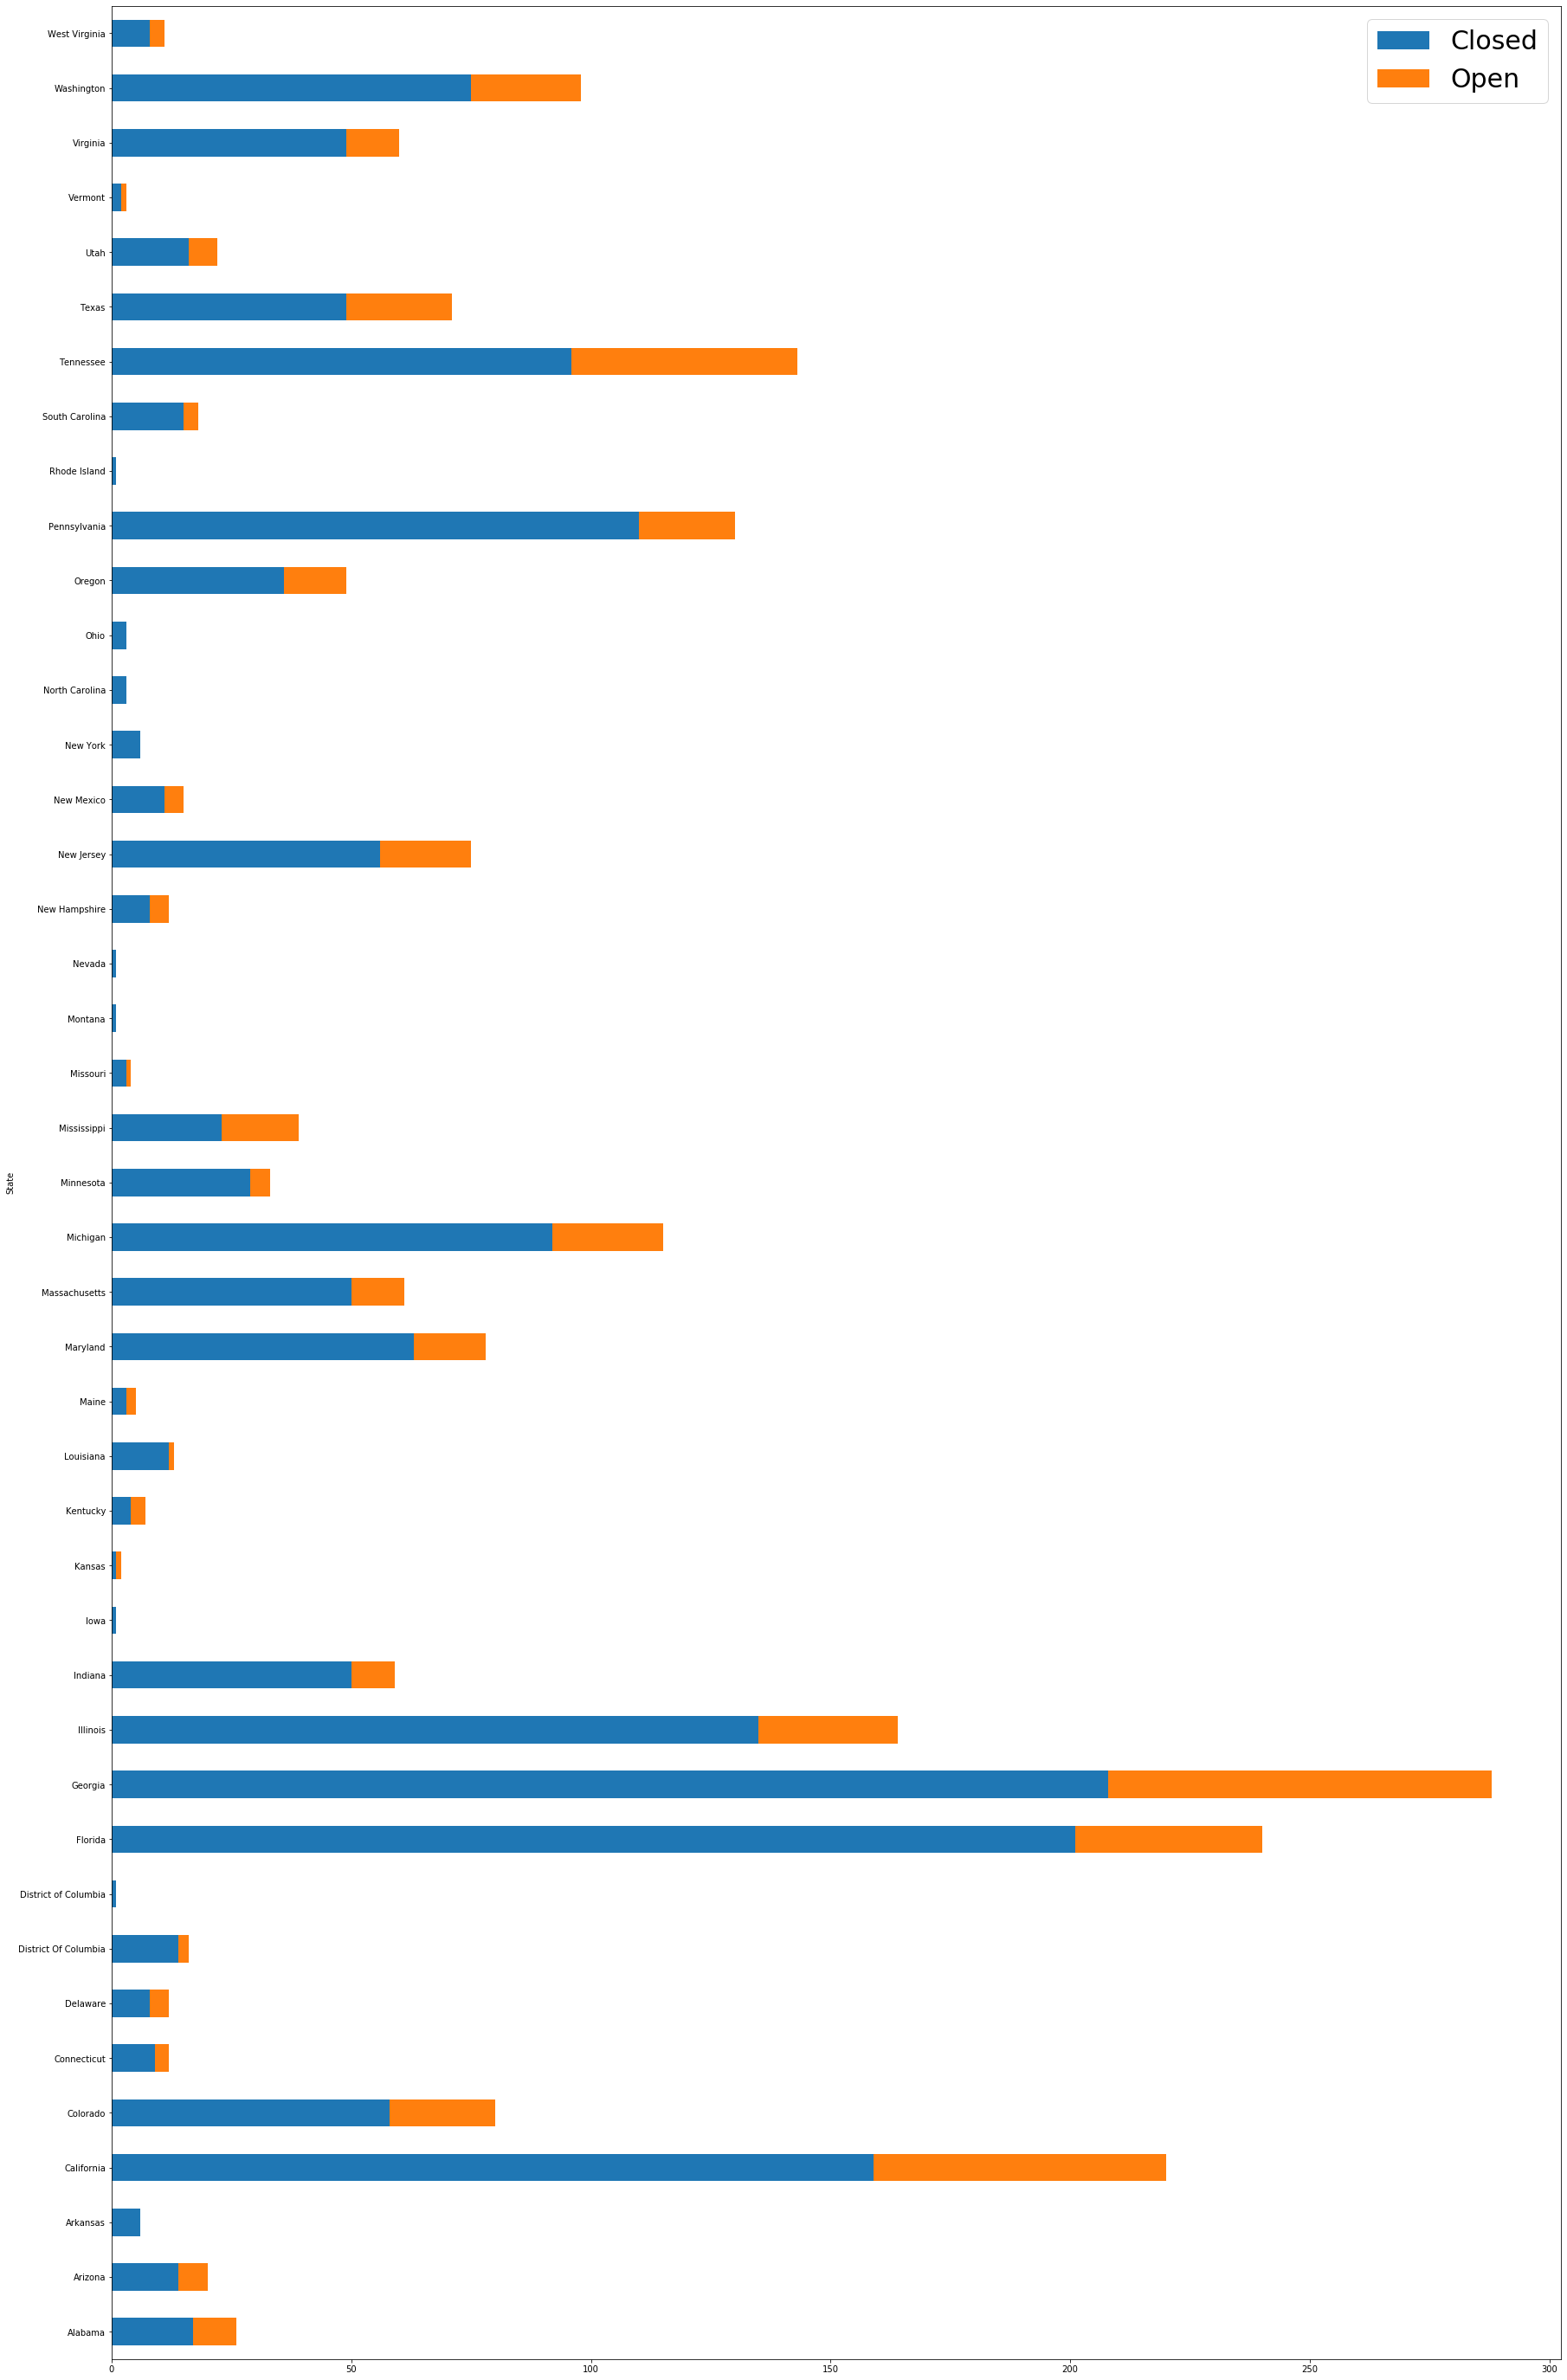

In [127]:
#Graph of statewise status of complaints
Status_complaints.plot(kind="barh", figsize=(30,50), stacked=True);
plt.legend(fontsize=30)

In [128]:
Status_complaints.describe()

Status_open_closed,Closed,Open
count,43.000000,43.000000
mean,39.697674,12.023256
std,53.359310,17.252313
min,1.000000,0.000000
25%,3.500000,1.000000
50%,14.000000,4.000000
75%,53.000000,17.500000
max,208.000000,80.000000


In [129]:
#Look for the state with the maximum number of complaints
df.State.max()

'West Virginia'

In [130]:
Status_complaints['Total'] = Status_complaints['Open'] + Status_complaints['Closed']

In [131]:
Status_complaints.head()

Status_open_closed,Closed,Open,Total
State,,,
Alabama,17.0,9.0,26.0
Arizona,14.0,6.0,20.0
Arkansas,6.0,0.0,6.0
California,159.0,61.0,220.0
Colorado,58.0,22.0,80.0


In [132]:
Status_complaints['Percent Unresolved'] = (Status_complaints['Open'] / Status_complaints['Total'])

In [133]:
Status_complaints.head()

Status_open_closed,Closed,Open,Total,Percent Unresolved
State,,,,
Alabama,17.0,9.0,26.0,0.346154
Arizona,14.0,6.0,20.0,0.300000
Arkansas,6.0,0.0,6.0,0.000000
California,159.0,61.0,220.0,0.277273
Colorado,58.0,22.0,80.0,0.275000


In [134]:
#Look for the State with the highest percentage of unresolved complaints
Status_complaints.loc[Status_complaints['Percent Unresolved'] == Status_complaints['Percent Unresolved'].max()]

Status_open_closed,Closed,Open,Total,Percent Unresolved
State,,,,
Kansas,1.0,1.0,2.0,0.5


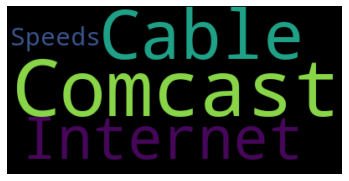

In [148]:
#To see the most common complaint type, create a Word Cloud to see the most common words within the complaints
from wordcloud import WordCloud

# Start with one review
text = df['Customer Complaint'][0]

# Create and generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [149]:
text = " ".join(review for review in df['Customer Complaint'])
print ("There are {} words in the combination of all reviews.".format(len(text)))

There are 71159 words in the combination of all reviews.


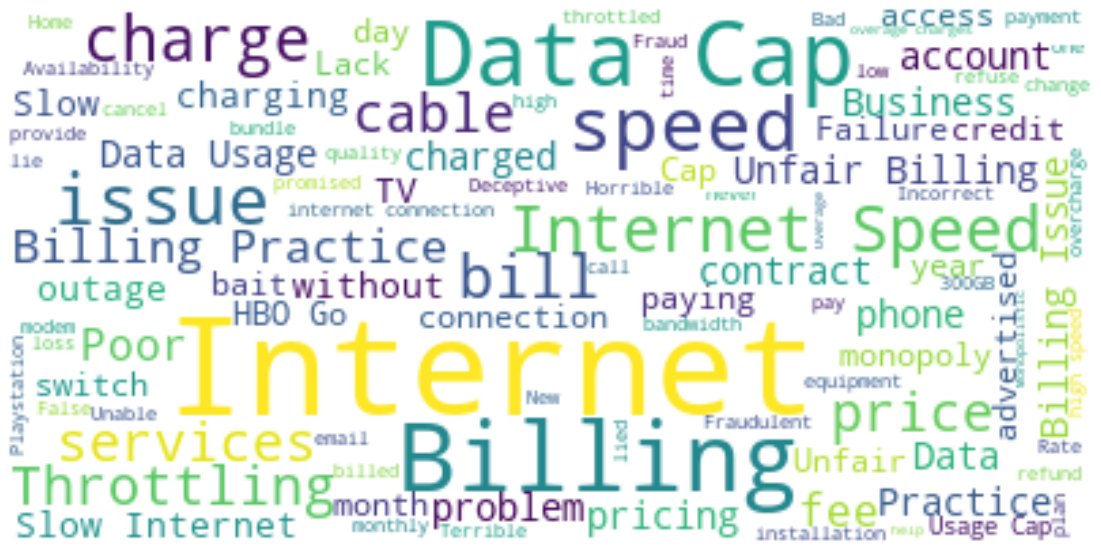

In [150]:
# Create stopword list:
stopwords.update(["Comcast", "not", "working","Xfinity","Service","Complaint","Customer"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white").generate(text)

# Set figure size
plt.figure(figsize=(20,10))

# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [138]:
df = df.rename({"Received Via": "Received_Via"}, axis=1)

In [139]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received_Via,City,State,Zip code,Status,Filing on Behalf of Someone,month,year,day,Status_open_closed
0,250635,Comcast Cable Internet Speeds,2015-04-22,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,2015,22,Closed
1,223441,Payment disappear - service got disconnected,2015-04-08,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,2015,4,Closed
2,242732,Speed and Service,2015-04-18,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,2015,18,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,2015,5,Open
4,307175,Comcast not working and no service to boot,2015-05-26,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,2015,26,Closed


In [140]:
df.Received_Via.value_counts()

Customer Care Call    1119
Internet              1105
Name: Received_Via, dtype: int64

In [141]:
Status_complaints_Received = df.groupby(["Received_Via","Status_open_closed"]).size().unstack()
Status_complaints_Received

Status_open_closed,Closed,Open
Received_Via,,
Customer Care Call,864,255
Internet,843,262


In [142]:
#Determine the percent resolved complaints from Customer Care Call and Internet
Status_complaints_Received['Total'] = Status_complaints_Received['Open'] + Status_complaints_Received['Closed']
Status_complaints_Received['Percent Resolved'] = (Status_complaints_Received['Closed'] / Status_complaints_Received['Total'])

In [143]:
Status_complaints_Received

Status_open_closed,Closed,Open,Total,Percent Resolved
Received_Via,,,,
Customer Care Call,864,255,1119,0.772118
Internet,843,262,1105,0.762896
